In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-boundaries-heat)

First, we define functions for the PDE and each boundary condition.

In [2]:
ϕ = (t, x, u, uₓ, uₓₓ) -> uₓₓ
g₁ = (u, uₓ) -> u
g₂ = (u, uₓ) -> u - 2;

Our next step is to write a function to define the initial condition. This one satisfies the boundary conditions exactly.

In [3]:
init = x -> 1 + sinpi(x/2) + 3 * (1-x^2) * exp(-4x^2);

Now we can use {numref}`Function {number} <function-parabolic>` to solve the problem.

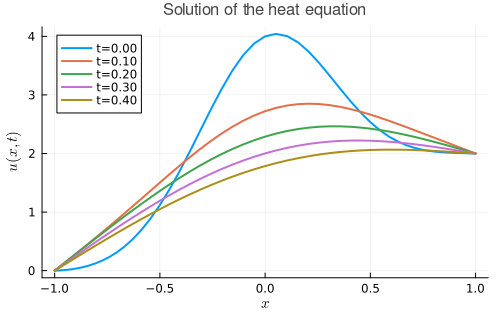

In [4]:
x, u = FNC.parabolic(ϕ, (-1, 1), 60, g₁, g₂, (0, 0.75), init)
plt = plot(
    xlabel=L"x",  ylabel=L"u(x,t)",
    legend=:topleft,  title="Solution of the heat equation")
for t in 0:0.1:0.4
    plot!(x, u(t), label=@sprintf("t=%.2f", t))
end
plt

In [5]:
anim = @animate for t in range(0,0.75,length=201) 
    plot(x, u(t);
        label=@sprintf("t=%.2f", t),  legend=:topleft,
        xaxis=(L"x"),  yaxis=(L"u(x,t)", (0, 4.2)), 
        title="Heat equation",  dpi=150)
end
mp4(anim, "boundaries-heat.mp4", fps=30)

[ Info: Saved animation to /Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter11/section5/julia/boundaries-heat.mp4


Plots.AnimatedGif("/Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter11/section5/julia/boundaries-heat.mp4")